In [22]:
#FFNN
from neural_networks import NeuralNet
from activations import *
import matplotlib.pyplot as plt



In [23]:
filepath_of_post_pca = '..\\..\\post_pca_data'

X_train = np.load(filepath_of_post_pca + '\\X_train.npy')
X_validate = np.load(filepath_of_post_pca + '\\X_validate.npy')
Y_train = np.load(filepath_of_post_pca + '\\Y_train.npy')
Y_validate = np.load(filepath_of_post_pca + '\\Y_validate.npy')

print(type(Y_validate))

<class 'numpy.ndarray'>


In [24]:
print(X_train.shape)
print(Y_train.shape)

(8000, 9)
(8000,)


In [25]:
#Class definitions
def tell_class(x):
    class_here = 'Error'
    if x == 0:
        class_here = '0 T-shirt/top'
    elif x == 1:
        class_here = '1 Trouser'
    elif x == 2:
        class_here = '2 Pullover'
    elif x == 3:
        class_here = '3 Dress'
    elif x == 4:
        class_here = '4 Shirt'

    return(f"Class: {class_here}")

In [26]:
def post_pca_seperate_image_class(data_point_number):

    
    array_of_the_image = X_train[data_point_number]

    class_of_the_image = tell_class(Y_train[data_point_number])


    return array_of_the_image, class_of_the_image

ValueError: cannot reshape array of size 9 into shape (28,28)

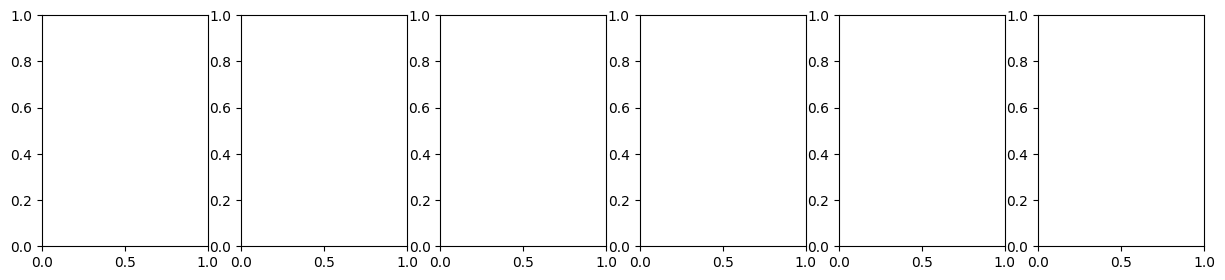

In [27]:
image_choices = [100, 4511, 200, 300, 444, 500]

image_shape = (28, 28)

fig, axs = plt.subplots(1, len(image_choices), figsize=(15, 3))

n = 0

for image in image_choices:

        this_image_info = post_pca_seperate_image_class(image)

        axs[n].imshow(this_image_info[0].reshape(image_shape), cmap='gray')
        axs[n].set_title(f"{this_image_info[1]}")

In [15]:
#network hyperparameters

#-- topology
n_features = X_train.shape[1]
n_hidden_1 = int(n_features * 0.7) 
n_hidden_2 = int(n_hidden_1 * 0.5)
n_outputs  = 5

topology   = [n_features, n_hidden_1, n_hidden_2, n_outputs]

#-- learning
learning_rate = 0.01
momentum = 0.1

In [17]:
first_attempt_at_FFNN = NeuralNet(
    topology=topology,
    learning_rate=learning_rate,
    momentum=momentum, 
    init_method='xavier',
    hidden_activation_func='sigmoid',
)

first_attempt_at_FFNN.shape

(9, 6, 3, 5)

In [18]:
first_attempt_at_FFNN.n_trainable_params

101

In [19]:
first_attempt_at_FFNN.train(X_train, Y_train, epochs = 5)

TypeError: 'str' object is not callable